# 04 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `04_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_04` folder, in which you create another folder called `data`
4. Copy paste the notebook `04_Homework` from the lectures repo to the working-folder. Copy the csv file `WHO_COVID19_cases.csv` into the `working-folder/Session_04/data` directory.
5. Do the exercises on 04_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 24th 01:29 pm CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## Dataset: use the WHO_COVID19_cases.csv dataset from Session_01

## 1- Filter the data for 3 countries and draw a line plot for Cumulative_cases vs Date_reported using seaborn (7.5 points)

*Tip: you may want to explore `plt.xticks(rotation=90);` and `plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6)) ;` to unclutter the dates on the x-axis*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [13]:
df = pd.read_csv('data/WHO_COVID19_cases.csv')

print(df.head(30))

print(df['Country'].unique())

   Date_reported Country_code      Country Continent WHO_region  New_cases  \
0     2020-01-05           AF  Afghanistan      Asia       EMRO        NaN   
1     2020-01-12           AF  Afghanistan      Asia       EMRO        NaN   
2     2020-01-19           AF  Afghanistan      Asia       EMRO        NaN   
3     2020-01-26           AF  Afghanistan      Asia       EMRO        NaN   
4     2020-02-02           AF  Afghanistan      Asia       EMRO        NaN   
5     2020-02-09           AF  Afghanistan      Asia       EMRO        NaN   
6     2020-02-16           AF  Afghanistan      Asia       EMRO        NaN   
7     2020-02-23           AF  Afghanistan      Asia       EMRO        NaN   
8     2020-03-01           AF  Afghanistan      Asia       EMRO        1.0   
9     2020-03-08           AF  Afghanistan      Asia       EMRO        NaN   
10    2020-03-15           AF  Afghanistan      Asia       EMRO        6.0   
11    2020-03-22           AF  Afghanistan      Asia       EMRO 

In [15]:
# Filter data for three countries
countries = ['Romania', 'Hungary', 'Ukraine']
df_filtered_countries = df[df['Country'].isin(countries)]

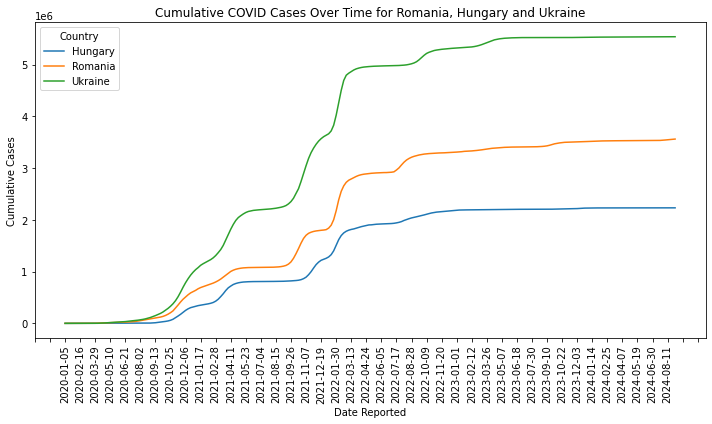

In [17]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_filtered_countries, x='Date_reported', y='Cumulative_cases', hue='Country')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust the frequency of ticks on the x-axis
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6))

# Add plot labels and title
plt.xlabel('Date Reported')
plt.ylabel('Cumulative Cases')
plt.title('Cumulative COVID Cases Over Time for Romania, Hungary and Ukraine')

# Show plot
plt.tight_layout()
plt.show()

## 2- Make a line plot showing the cumulative_deaths vs cumulative_cases for 3 countries using `plotly` (7.5 points)

In [9]:
import plotly.express as px

In [18]:
fig = px.line(df_filtered_countries, 
              x='Cumulative_cases', 
              y='Cumulative_deaths', 
              color='Country', 
              title='Cumulative Deaths vs Cumulative Cases for Romania, Hungary and Ukraine')

fig.show()